In [2]:
using Pkg
#Pkg.add("Distributions")
using Distributions
using PyPlot

┌ Info: Recompiling stale cache file /home/erichschulman/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/erichschulman/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


In [3]:
#coordination game

#player, action 1, action 2
payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [1 1 ; 1 1]

function simulate_game(payoffs,beliefs;T=10,update=true)
    
    #infer # of players and actions
    players = 2
    actions = 2
    trial = zeros(T,players)
    beliefs = beliefs[:,:]
    for t =1:T
        choices = []
        for k=1:players
            expected_payoffs = []
            for i=1:actions
                belief_t = beliefs[k,:]/sum(beliefs[k,:])
                payoff = sum( belief_t .* payoffs[k][i,:]) + rand(Gumbel())
                append!(expected_payoffs,payoff)
            end
            append!(choices,argmax(expected_payoffs))
        end
        for k=1:players
            if choices[k]==1
                trial[t,k] = 1
            end
            
            if update
                not_k = mod(k,2)+1
                beliefs[k,choices[not_k]] = beliefs[k,choices[not_k]] +1
            end
        end
    end
    
    return trial
end

print(simulate_game(payoffs,priors))

print(priors)

[1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 0.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0][1 1; 1 1]

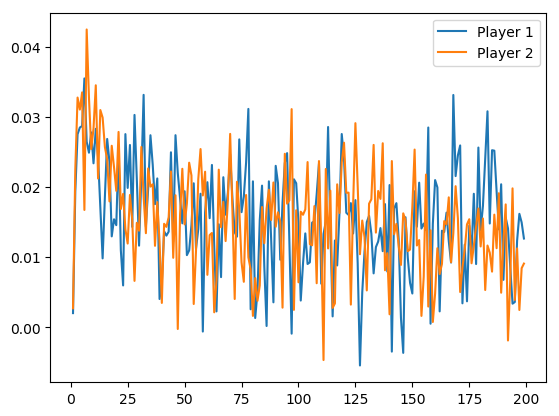

PyObject <matplotlib.legend.Legend object at 0x7f015f826c18>

In [27]:
#different lag

l = 1
N =1000
T= 200

#player, action 1, action 2
payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [2 0 ; 0 2]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T)
end


corr1 = zeros(T-l)
corr2 = zeros(T-l)
for t=1:(T-l)   
    corr1[t] =sum(data[:,t,2].*data[:,t+l,1])/N - sum(data[:,t,2])*sum(data[:,t+l,1])/(N*N)
    corr2[t] =sum(data[:,t,1].*data[:,t+l,2])/N - sum(data[:,t,1])*sum(data[:,t+l,2])/(N*N)
end


plot(collect(1:T-l),corr1, label="Player 1")
plot(collect(1:T-l),corr2, label="Player 2")
legend()

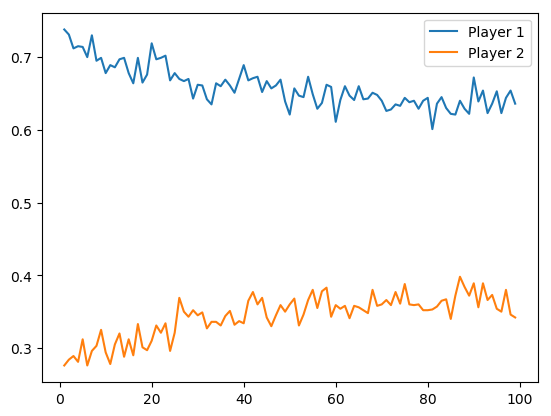

PyObject <matplotlib.legend.Legend object at 0x7f016078f828>

In [18]:
N =1000
T= 100

#player, action 1, action 2 -- cordination game
payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [20 20 ; 20 20]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T)
end


corr1 = zeros(T-1)
corr2 = zeros(T-1)
for t=1:(T-1)   
    corr1[t] =sum(data[:,t,1]/N) #.*data[:,t+1,1])/N # - sum(data[:,t,1])*sum(data[:,t+1,1])/(N*N)
    corr2[t] =sum(data[:,t,2]/N) #.*data[:,t+1,2])/N #- sum(data[:,t,2])*sum(data[:,t+1,2])/(N*N)
end


plot(collect(1:T-1),corr1, label="Player 1")
plot(collect(1:T-1),corr2, label="Player 2")
legend()

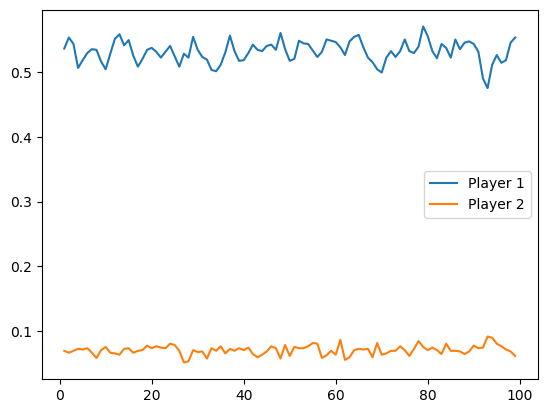

PyObject <matplotlib.legend.Legend object at 0x7fbc3448c690>

In [72]:
#no updating

N =1000
T= 100

#player, action 1, action 2
payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [20 20 ; 20 20]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T, update=false)
end


corr1 = zeros(T-1)
corr2 = zeros(T-1)
for t=1:(T-1)   
    corr1[t] =sum(data[:,t,1].*data[:,t+1,1])/N  #- sum(data[:,t,1])*sum(data[:,t+1,1])/(N*N)
    corr2[t] =sum(data[:,t,2].*data[:,t+1,2])/N #- sum(data[:,t,2])*sum(data[:,t+1,2])/(N*N)
end


plot(collect(1:T-1),corr1, label="Player 1")
plot(collect(1:T-1),corr2, label="Player 2")
legend()

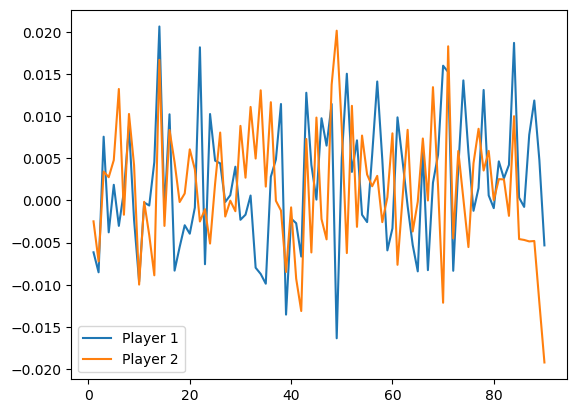

PyObject <matplotlib.legend.Legend object at 0x7fbc343f7350>

In [73]:
#different lag

l = 10
N =1000
T= 100

#player, action 1, action 2
payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [20 10 ; 10 20]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T)
end


corr1 = zeros(T-l)
corr2 = zeros(T-l)
for t=1:(T-l)   
    corr1[t] =sum(data[:,t,1].*data[:,t+l,1])/N  - sum(data[:,t,1])*sum(data[:,t+l,1])/(N*N)
    corr2[t] =sum(data[:,t,2].*data[:,t+l,2])/N - sum(data[:,t,2])*sum(data[:,t+l,2])/(N*N)
end


plot(collect(1:T-l),corr1, label="Player 1")
plot(collect(1:T-l),corr2, label="Player 2")
legend()

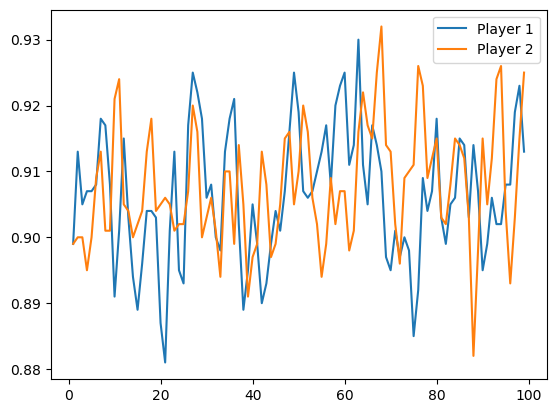

PyObject <matplotlib.legend.Legend object at 0x7fbc343e6950>

In [74]:
N =1000
T= 100

#player, action 1, action 2 -- prisoners dilemma
payoffs = [ [3 4 ; 0 1], [3 4 ; 0 1] ]

#player, action (not yours)
priors = [20 20 ; 20 20]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T)
end


corr1 = zeros(T-1)
corr2 = zeros(T-1)
for t=1:(T-1)   
    corr1[t] =sum(data[:,t,1].*data[:,t+1,1])/N # - sum(data[:,t,1])*sum(data[:,t+1,1])/(N*N)
    corr2[t] =sum(data[:,t,2].*data[:,t+1,2])/N #- sum(data[:,t,2])*sum(data[:,t+1,2])/(N*N)
end


plot(collect(1:T-1),corr1, label="Player 1")
plot(collect(1:T-1),corr2, label="Player 2")
legend()

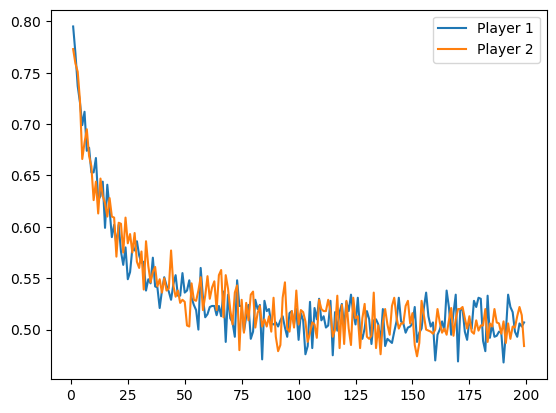

PyObject <matplotlib.legend.Legend object at 0x7fbc3436dc90>

In [75]:
N =1000
T= 200

#player, action 1, action 2 -- matching pennies
payoffs = [ [-1 1 ; 1 -1], [-1 1 ; 1 -1] ]

#player, action (not yours)
priors = [5 20 ; 5 20]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T)
end


corr1 = zeros(T-1)
corr2 = zeros(T-1)
for t=1:(T-1)   
    corr1[t] =sum(data[:,t,1])/N #.*data[:,t+1,1])/N # - sum(data[:,t,1])*sum(data[:,t+1,1])/(N*N)
    corr2[t] =sum(data[:,t,2])/N #.*data[:,t+1,2])/N #- sum(data[:,t,2])*sum(data[:,t+1,2])/(N*N)
end


plot(collect(1:T-1),corr1, label="Player 1")
plot(collect(1:T-1),corr2, label="Player 2")
legend()